In [1]:
import pandas as pd 
students=pd.read_csv('Student_List.csv')
students.count()

StudentID            1500
Age                  1500
ParentalEducation    1500
StudyTimeWeekly      1500
Absences             1500
Tutoring             1500
ParentalSupport      1500
Extracurricular      1500
Sports               1500
Music                1500
Volunteering         1500
GPA                  1500
GradeClass           1500
dtype: int64

In [5]:
students.head()

,StudentID,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1640,18,Some College,10.318918,5,No,2,No,Yes,No,No,2.655994,C
1,2939,16,Bachelor's,6.517803,2,Yes,2,No,Yes,No,No,3.474562,B
2,2877,15,Some College,0.815700,1,No,1,No,No,Yes,Yes,2.806878,C
3,1628,16,High School,6.304335,8,No,3,No,No,No,No,2.150546,D
4,2052,15,Some College,2.516047,14,Yes,3,Yes,No,No,No,2.253871,D


There are 1500 students. To determine how many students there is, I used the in built count method from Pandas. So far, this assumes that all the rows within the csv file are valid and represent a unique student.

In [7]:
age=students['Age']
range=age.max()-age.min() ##largest - smallest age = age range
range

3

The age range of this dataset is 3 years. More specifically the oldest age is 18 and the youngest is 15. (we can check this by looking at output of age.max() and age.min()

In [12]:
students.dtypes ##provides details about the data type of each column of the student dataframe.

StudentID              int64
Age                    int64
ParentalEducation     object
StudyTimeWeekly      float64
Absences               int64
Tutoring              object
ParentalSupport        int64
Extracurricular       object
Sports                object
Music                 object
Volunteering          object
GPA                  float64
GradeClass            object
dtype: object

Columns StudentID, Age, Absences, Parental Support are all of type int64. This indicates that values in these columns are all integers. Data of this type can only be counted/shown discretely. eg StudentID is an integer, Age and absences are recorded as a whole number. (Note: this is a design choice of the creator, Age and absences could have been recorded as a float)
   Columns StudyTimeWeekly, GPA are of type float64. This means all values in this column are of the form ##.####etc. This is for data that is numerical but NOT discrete/integers. For example it is possible to study 4.234 hours a week or have a 4.5 GPA.
   Columns ParentalEducation, Tutoring, Extracurricular, Sports, Music, Volunteering, and GradeClass are all objects. Note that all values in these columns are strings (eg: "Yes", "No") which are regarded as objects in python.

In [14]:
students=pd.read_csv('Student_List.csv')
students.groupby('GradeClass').count() #this counts how many rows/students exist for each group (GradeClass)

,StudentID,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
GradeClass,,,,,,,,,,,,
A,60,60,60,60,60,60,60,60,60,60,60,60
B,183,183,183,183,183,183,183,183,183,183,183,183
C,244,244,244,244,244,244,244,244,244,244,244,244
D,248,248,248,248,248,248,248,248,248,248,248,248
F,765,765,765,765,765,765,765,765,765,765,765,765


In [16]:
for row in students.groupby('GradeClass').count()['StudentID']:
    print(100*row/1500) #converting the number of students in each GradeClass group into a percentage

4.0
12.2
16.266666666666666
16.533333333333335
51.0


Grade A = 4%
   Grade B = 12.2%
   Grade C = 16.27%
   Grade D = 16.53%
   Grade F = 51%

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

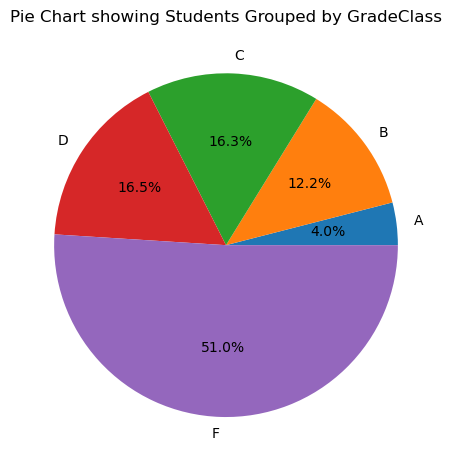

In [26]:
x=[]
for row in students.groupby('GradeClass').count()['StudentID']:
    x.append(row)
x
labels = ['A','B','C','D','F']
fig, ax = plt.subplots()
ax.pie(x, labels=labels,autopct='%.1f%%')
ax.set_title('Pie Chart showing Students Grouped by GradeClass')
plt.tight_layout()

Looking at the above pie chart, it is clear that as the grades increase (from F to A), the number of students decrease. This trend makes sense, as it is expected for less students to achieve a higher grade of A or B because it is objectively harder to do so. However an important observation is that the proportion of students in GradeClass C and D are almost identical, and there are more than half of the students with an F grade. One may think that this is a huge proportion (51% for an F grade) but at a closer look this is not particularly surprising when you consider that an F grade here implies a GPA of 2.0> when an F grade is more commonly appointed to students with a 0.0 GPA.  

Exploring Parental Education

In [28]:
students

,StudentID,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1640,18,Some College,10.318918,5,No,2,No,Yes,No,No,2.655994,C
1,2939,16,Bachelor's,6.517803,2,Yes,2,No,Yes,No,No,3.474562,B
2,2877,15,Some College,0.815700,1,No,1,No,No,Yes,Yes,2.806878,C
3,1628,16,High School,6.304335,8,No,3,No,No,No,No,2.150546,D
4,2052,15,Some College,2.516047,14,Yes,3,Yes,No,No,No,2.253871,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1944,15,No Education,10.596678,12,No,1,No,No,No,Yes,1.621012,F
1496,1566,16,Some College,3.278634,4,Yes,4,Yes,No,No,No,3.244882,B
1497,3268,18,Some College,7.598010,0,Yes,3,No,No,No,No,3.040730,F
1498,3237,17,Some College,15.078754,24,No,4,No,No,Yes,No,1.245091,F


In [30]:
students.groupby('ParentalEducation').count()

,StudentID,Age,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
ParentalEducation,,,,,,,,,,,,
Bachelor's,234,234,234,234,234,234,234,234,234,234,234,234
High School,458,458,458,458,458,458,458,458,458,458,458,458
Higher,77,77,77,77,77,77,77,77,77,77,77,77
No Education,154,154,154,154,154,154,154,154,154,154,154,154
Some College,577,577,577,577,577,577,577,577,577,577,577,577


77 parents have Higher Education
   154 parents have no education
   The most common level of parental education is 'Some College', with 577 parents that have attended a college before.

In [228]:
students.replace({'ParentalEducation':{'No Education':0, 'High School':1,'Some College':2,'Bachelor\'s':3,'Higher':4}})

,StudentID,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1640,18,2,10.318918,5,No,2,No,Yes,No,No,2.655994,C
1,2939,16,3,6.517803,2,Yes,2,No,Yes,No,No,3.474562,B
2,2877,15,2,0.815700,1,No,1,No,No,Yes,Yes,2.806878,C
3,1628,16,1,6.304335,8,No,3,No,No,No,No,2.150546,D
4,2052,15,2,2.516047,14,Yes,3,Yes,No,No,No,2.253871,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1944,15,0,10.596678,12,No,1,No,No,No,Yes,1.621012,F
1496,1566,16,2,3.278634,4,Yes,4,Yes,No,No,No,3.244882,B
1497,3268,18,2,7.598010,0,Yes,3,No,No,No,No,3.040730,F
1498,3237,17,2,15.078754,24,No,4,No,No,Yes,No,1.245091,F


shown above.. (Would like to note that at the time of coding and submission, this code still works, but there is a warning that using the 'replace' method will be removing in a future version)

Text(0.5, 0, 'Level of Parental Education')

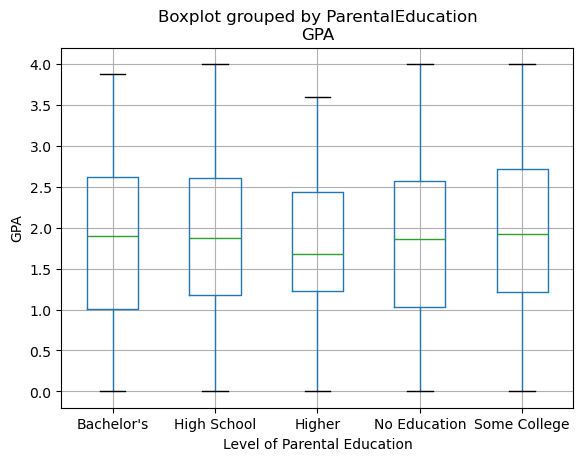

In [171]:
students.boxplot(column = 'GPA',by='ParentalEducation')
plt.ylabel('GPA')
plt.xlabel('Level of Parental Education')

There is not a strong relationship between parental education and GPA. One would expect the GPA to increase, as the Parental Education increases, but contrarily, the highest parental education level have a noticeably lower range and median of GPA compared to all the other levels. Otherwise, the spread of GPA appears similar across all levels of parental education.

GPA distribution and Correlation Analysis

Text(0.5, 1.0, 'Histogram showing Distribution of students by GPA')

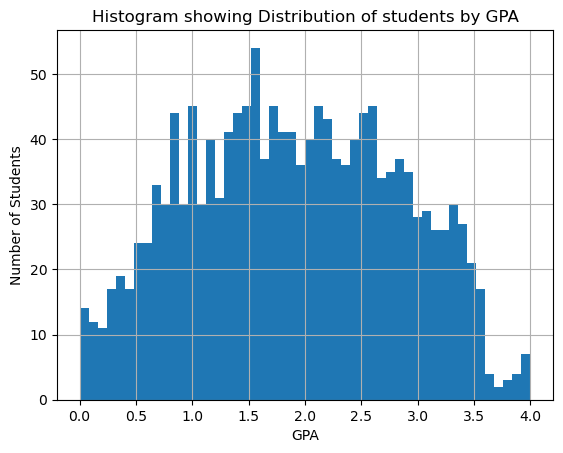

In [198]:
students.GPA.hist(bins=50)
plt.xlabel('GPA')
plt.ylabel('Number of Students')
plt.title('Histogram showing Distribution of students by GPA')

Histogram shown above. The distribution looks for the most part like a normal distribution, where more students populate the middle range of GPA (1.5-2.5) and there are less students as the GPA increases, and less students as the GPA decreases. Something noticeable is that there are a lot more students with around a 1.5 which does not follow the underlying normal distribution trend. The same can be said for students with a 0.8 and 1.0 GPA.

Also, taking a closer look at the 3.5 - 4.0 GPA range, an unexpected trend can be seen, where there are more students achieving a 3.8-4.0 GPA compared to the 3.6-3.8 range when the opposite should be expected.

Text(0.5, 1.0, 'Scatterplot Showing Weekly Study Time vs GPA')

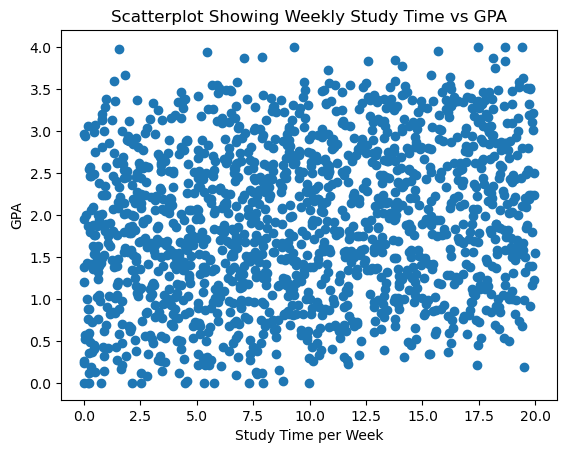

In [211]:
plt.scatter(students['StudyTimeWeekly'],students['GPA'])
plt.ylabel('GPA')
plt.xlabel('Study Time per Week')
plt.title('Scatterplot Showing Weekly Study Time vs GPA')

In [191]:
correlation1 = students['GPA'].corr(students['StudyTimeWeekly'])
print(correlation1)

0.19049313037112514


The scatterplot looks like there is an extremely weak yet positive correlation between GPA and Study Time Weekly. This is further supported by the low correlation coefficient between these two (0.19). This indicates that a higher or lower weekly study time does not make a considerable difference to one's GPA. (Contrary to what is expected)

Text(0.5, 1.0, 'Scatterplot Showing Number of Absences vs GPA')

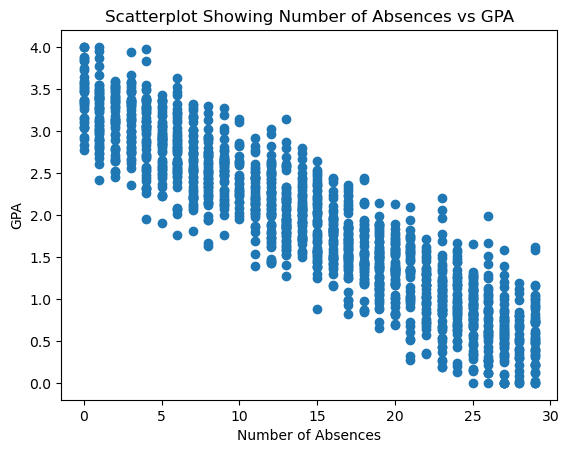

In [213]:
plt.scatter(students['Absences'],students['GPA'])
plt.ylabel('GPA')
plt.xlabel('Number of Absences')
plt.title('Scatterplot Showing Number of Absences vs GPA')

In [217]:
correlation2 = students['GPA'].corr(students['Absences'])
print(correlation2)

-0.9194876943290947


The scatterplot shows a strong negative linear correlation, further supported by the correlation coefficient between GPA and Absences being -0.919. This indicates that an increase in the number of absences will negatively impact GPA.

Extracurricular Activities 

In [9]:
students=pd.read_csv('Student_List.csv')
students
groupA=students.loc[(students['Sports'] == 'Yes')|(students['Music'] == 'Yes') |(students['Volunteering'] == 'Yes')|(students['Extracurricular'] == 'Yes')  ]
#this selects rows that satisfy the following condition: at least one value of Sports, Music, Volunteering and Extracurricular in the row are 'Yes'
groupA

,StudentID,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1640,18,Some College,10.318918,5,No,2,No,Yes,No,No,2.655994,C
1,2939,16,Bachelor's,6.517803,2,Yes,2,No,Yes,No,No,3.474562,B
2,2877,15,Some College,0.815700,1,No,1,No,No,Yes,Yes,2.806878,C
4,2052,15,Some College,2.516047,14,Yes,3,Yes,No,No,No,2.253871,D
5,2368,16,Some College,13.183111,21,No,3,No,Yes,No,No,1.625552,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,1965,17,Higher,2.405419,6,Yes,1,No,No,Yes,No,2.806698,C
1495,1944,15,No Education,10.596678,12,No,1,No,No,No,Yes,1.621012,F
1496,1566,16,Some College,3.278634,4,Yes,4,Yes,No,No,No,3.244882,B
1498,3237,17,Some College,15.078754,24,No,4,No,No,Yes,No,1.245091,F


There are 1068 Students that are involved in Sports, Music, Volunteering and Extracurricular activities.

In [92]:
groupB=students.loc[(students['Sports'] == 'No')&(students['Music'] == 'No')&(students['Volunteering'] == 'No')&(students['Extracurricular'] == 'No')  ]
groupB

,StudentID,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
3,1628,16,High School,6.304335,8,No,3,No,No,No,No,2.150546,D
6,2555,18,Some College,3.521786,22,No,4,No,No,No,No,0.935779,F
7,2513,15,High School,4.459000,27,No,1,No,No,No,No,0.000000,F
8,2811,16,Some College,7.520836,5,No,0,No,No,No,No,2.631368,C
11,1220,17,High School,1.232160,17,No,3,No,No,No,No,1.465549,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,2978,17,High School,9.921510,4,No,1,No,No,No,No,2.307597,D
1483,2773,15,High School,4.915006,21,No,2,No,No,No,No,0.728795,F
1487,1585,16,Some College,12.276919,22,No,4,No,No,No,No,1.583084,F
1489,2049,15,Bachelor's,6.997909,21,No,3,No,No,No,No,1.137900,F


There are 432 students that are not involved in Sports, Music, Volunteering and Extracurricular activities.

In [98]:
groupA['GPA'].mean() #average GPA of group A

1.9697375186329584

In [100]:
groupB['GPA'].mean()  #average GPA of group B

1.7312226005532407

In [102]:
groupA['GPA'].mean()-groupB['GPA'].mean()

0.2385149180797177

In [106]:
students['GPA'].mean() ##average GPA of all students

1.9010452222260001

The students in group A have a higher GPA on average compared to group B by ~0.24. This MAY suggest that Sports, Music, Volunteering and Extracurricular activities may have a positive impact on GPA. However, it is important to consider that the number of students in group A is more than 2 times bigger than the number of students in group B (1068 vs 432 out of 1500 students), in fact the number of students in groupA is more than 2/3 of the number of total students. Taking a bigger sample size of the population would in general bring the average GPA closer to the GPA average of the entire population (1500 students) as the sample size approaches the size of the entire population. This means that the fact that average GPA of groupA>groupB does not necessarily mean that doing activies will increase a students GPA on average, however there may still be a slight effect. More analysis needs to be done to conclude this hypothesis. (suggestions: doing correlation of sports/music/volunteering/extracurricular with GPA)



In [45]:
example = students.replace({'Extracurricular':{'Yes': 1,'No': 0}})

corre = example['GPA'].corr(example['Extracurricular'])
print(corre)

0.08480184419105721


Exploring Parental Support and Tutoring

In [110]:
students

,StudentID,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1640,18,Some College,10.318918,5,No,2,No,Yes,No,No,2.655994,C
1,2939,16,Bachelor's,6.517803,2,Yes,2,No,Yes,No,No,3.474562,B
2,2877,15,Some College,0.815700,1,No,1,No,No,Yes,Yes,2.806878,C
3,1628,16,High School,6.304335,8,No,3,No,No,No,No,2.150546,D
4,2052,15,Some College,2.516047,14,Yes,3,Yes,No,No,No,2.253871,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1944,15,No Education,10.596678,12,No,1,No,No,No,Yes,1.621012,F
1496,1566,16,Some College,3.278634,4,Yes,4,Yes,No,No,No,3.244882,B
1497,3268,18,Some College,7.598010,0,Yes,3,No,No,No,No,3.040730,F
1498,3237,17,Some College,15.078754,24,No,4,No,No,Yes,No,1.245091,F


In [194]:
a5median=students.groupby('ParentalSupport').agg(medianGPA = ('GPA','median')) ## median GPA of students grouped by parental support
a5median=a5median.reset_index() #turning parental support group into column values
a5median

,ParentalSupport,medianGPA
0,0,1.471672
1,1,1.740455
2,2,1.817007
3,3,2.070669
4,4,2.215516


In [196]:
a5mean=students.groupby('ParentalSupport').agg(meanGPA = ('GPA','mean'))## mean GPA of students grouped by parental support
a5mean=a5mean.reset_index() #turning parental support group into column values
a5mean

,ParentalSupport,meanGPA
0,0,1.521602
1,1,1.735855
2,2,1.845914
3,3,2.068174
4,4,2.227639


mean and median GPA group by parental support are shown above in the tables.

In [164]:
students.groupby('ParentalSupport')['GPA']
for i in [0,1,2,3,4]: #for each number in parental support 0,1,2,3,4
    z=students.loc[(students['ParentalSupport'] == i)] #select the rows 
    print(z.loc[(z['Age'] == 18)].count()) # count how many of these rows are have age = 18

StudentID            33
Age                  33
ParentalEducation    33
StudyTimeWeekly      33
Absences             33
Tutoring             33
ParentalSupport      33
Extracurricular      33
Sports               33
Music                33
Volunteering         33
GPA                  33
GradeClass           33
dtype: int64
StudentID            80
Age                  80
ParentalEducation    80
StudyTimeWeekly      80
Absences             80
Tutoring             80
ParentalSupport      80
Extracurricular      80
Sports               80
Music                80
Volunteering         80
GPA                  80
GradeClass           80
dtype: int64
StudentID            98
Age                  98
ParentalEducation    98
StudyTimeWeekly      98
Absences             98
Tutoring             98
ParentalSupport      98
Extracurricular      98
Sports               98
Music                98
Volunteering         98
GPA                  98
GradeClass           98
dtype: int64
StudentID            116


The above loop shows that there are 33 students that are 18 and have no parental support (0).
There are 80 students that are 18 and have low parental support (1).
There are 98 students that are 18 and have moderate parental support (2).
There are 116 students that are 18 and have high parental support (3).
There are 35 students that are 18 and have very high parental support (4).

In [254]:
a5median['ParentalSupport']=a5median['ParentalSupport'].replace(0,'None')
a5median['ParentalSupport']=a5median['ParentalSupport'].replace(1,'Low')
a5median['ParentalSupport']=a5median['ParentalSupport'].replace(2,'Moderate')
a5median['ParentalSupport']=a5median['ParentalSupport'].replace(3,'High')
a5median['ParentalSupport']=a5median['ParentalSupport'].replace(4,'Very High')
a5median
a5median['medianGPA']
x1 = []
for row in a5median['medianGPA']:
    x1.append(row)
x1 #putting the median GPAs of each parental support group into a list x1
    

[1.471672029, 1.7404551504999999, 1.817007139, 2.070669312, 2.215515609]

In [256]:
a5mean['ParentalSupport']=a5median['ParentalSupport'].replace(0,'None')
a5mean['ParentalSupport']=a5median['ParentalSupport'].replace(1,'Low')
a5mean['ParentalSupport']=a5median['ParentalSupport'].replace(2,'Moderate')
a5mean['ParentalSupport']=a5median['ParentalSupport'].replace(3,'High')
a5mean['ParentalSupport']=a5median['ParentalSupport'].replace(4,'Very High')
a5mean
x2 = []
for row in a5mean['meanGPA']:
    x2.append(row)
x2 #putting the mean GPAs of each parental support group into a list x2

[1.5216016961908398,
 1.7358547537601352,
 1.8459140227050208,
 2.0681743177448277,
 2.22763920595625]

Text(0.5, 1.0, 'Mean and Median GPA grouped by Parental Support')

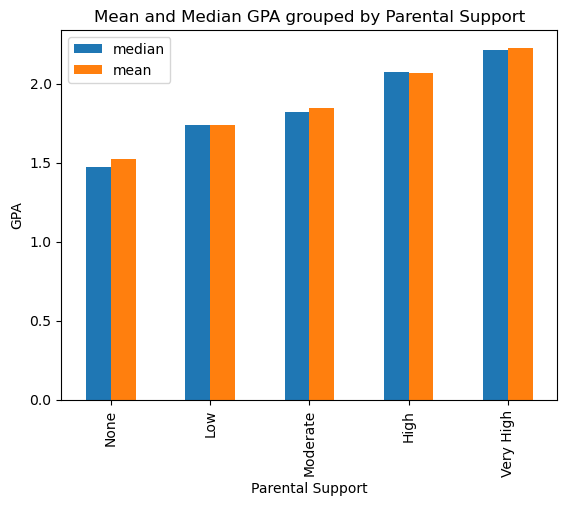

In [282]:
index = ['None','Low','Moderate','High','Very High']
df5=pd.DataFrame({'median' : x1,'mean':x2},index=index)
ax = df5.plot.bar()
plt.xlabel('Parental Support')
plt.ylabel('GPA')
plt.title('Mean and Median GPA grouped by Parental Support')

In [301]:
a5q3=students.groupby('Tutoring').agg(meanGPA = ('GPA','mean'))
a5q3.reset_index()

,Tutoring,meanGPA
0,No,1.804967
1,Yes,2.123106


Text(0.5, 1.0, 'GPA of students with vs without tutoring')

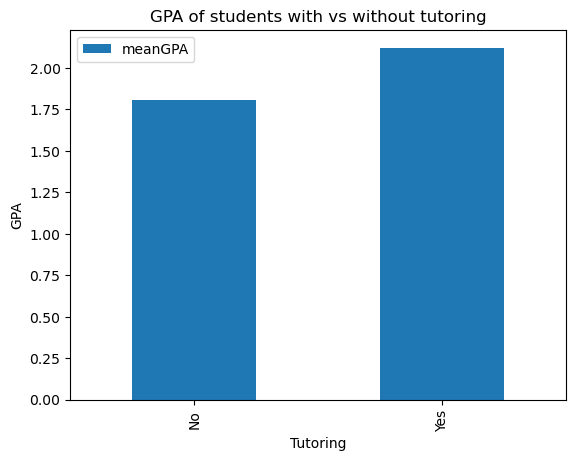

In [307]:
a5q3.plot.bar()
plt.xlabel('Tutoring')
plt.ylabel('GPA')
plt.title('GPA of students with vs without tutoring')

The bar shart displays that on average, students who receive tutoring on average have a higher GPA than those who do not (~0.32 more). On a logical basis, this result is not surprising, those who receive more assistance with their school work should understand their content better and therefore achieve a higher GPA on average than those who do not.